In [6]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd


### First of all we should read a data for classification.
Data will be read to X variable (input ) and Y (output)

In [7]:

line_count=0
with open('iris-write-from-docker.csv')as file:
    
    csv_reader = csv.reader(file, delimiter=',')
    
    
    X=[]
    Y=[]
    for row in csv_reader:
        if line_count!=0 and line_count<100:
            add=[]
            genere=row[4]
            genere =1 if genere=='Iris-setosa' else -1
            add=float(row[0]),float(row[2])
            add=list(add)
            X.append(add)
            Y.append(genere)
            line_count+=1
        else:
             line_count+=1
            
   
    print(line_count)

151


#####
Below you can see an implementation of simple perceptron. In this scenario weights are updated separately for every training example.
Weights are randomly assigned with values coming from normal distribution. 
Eta parameter - Training rate should be small but not too small, because then perceptron will learn slowly.

In [8]:
class Perceptron(object):
    def __init__(self,eta,n,randstate):
        self.eta=eta
        self.n=n #liczba iteracji
        self.randstate=randstate
    def fit(self,X,Y):
        #X-wektor wejsciowy
        #Y-wektor przypisujący klasy
        rgen = np.random.RandomState(self.randstate)
        self.w= np.random.normal(loc=0.0,scale=0.01,size=3)#wagi
        self.error = []
        
        for _ in range(self.n):
            error=0
            
            for x,target in zip(X,Y):
                update=self.eta*(target-(self.predict(x)))
                
                
                
                #self.w[1:]=[a*update+a for a in self.w[1:]]
                self.w[1:]=[x[a]*update+self.w[a+1] for a in range(len(x))]
                
                self.w[0]=self.w[0]+update
                
                error  += int(update != 0.0)
                
            self.error.append(error)
        
        return self

    def predict(self,x):
        
        dot_prod=0
        for i,k in zip(x,self.w[1:]):
            
            dot_prod=i*k+dot_prod
        dot_prod=dot_prod+self.w[0]
        
        result=1 if dot_prod>=0 else -1
        
        return result
            
        
        

### 
As we can see on a plot perceptron managed to separe two iris classes after 6 epochs. 

Text(0, 0.5, 'Update count')

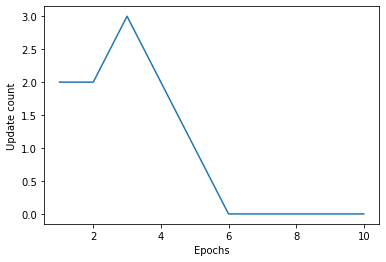

In [9]:
a=Perceptron(0.05,10,1)
a.fit(X,Y)
a.error

plt.plot(list(range(1,(len(a.error)+1))),a.error)
plt.xlabel('Epochs')
plt.ylabel('Update count')




In [10]:
#df_init
X_0=[x[0] for x in X]
X_1=[x[1] for x in X]
Y=[y for y in Y]
d={'x1':X_0,'x2':X_1,'y':Y}
data_to_plot=pd.DataFrame(data=d)

In [11]:
slope=-(a.w[1]/a.w[2])
wolny=-(a.w[0]/a.w[2])

In [12]:
x_range=np.arange(3,8,0.1)
y_calc=[i*slope+wolny for i in x_range]

As we can see on a plot below Iris setosa can be easily separated from Iris versicolor with bonduary line

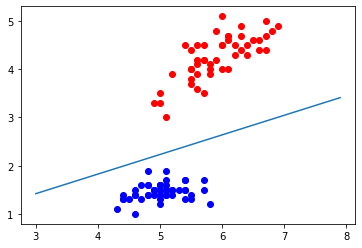

In [13]:
a=data_to_plot.loc[:100,['x1','x2','y']].values
plt.scatter(a[:50,0],a[:50,1],color='blue')
plt.scatter(a[51:,0],a[51:,1],color='red')

plt.plot(x_range,y_calc)



I've implemented below object named Perceptron_adeline. The difference between "base" implementationa and adeline is how the weights are updated. In adeline model weights are updated with gradient descent methods. Weights are updated based on all training dataset. If'you are about to minimise cost function with gradient descent you have to remember to set appropriate learning rate. The consequences of choosing inapropriate learning coefficient will be shown on plots.

In [14]:
class Perceptron_adeline(Perceptron):
    
    def fit(self,X,Y):
        #self.w= np.random.normal(loc=0.0,scale=0.01,size=len(X[1])+1)
        self.w=[0.1,0.2,0.3]
        self.cost_=[]
    
        for _ in range(self.n):
            
            
            output = self.dot_prod(X)
           
            errors = (Y - output)
            
            self.w[1:] += self.eta * (X.T.dot(errors))
            
            
            self.w[0] += self.eta * (errors.sum())
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
            
        
        return self

    def dot_prod(self,X):
        
        return np.dot(X,self.w[1:])+self.w[0]
    

In [40]:
adeline=Perceptron_adeline(0.00001,200,1)
adeline.fit(data_to_plot[['x1','x2']].values,data_to_plot['y'].values)

In [19]:

slope=-(adeline.w[1]/adeline.w[2])
wolny=-(adeline.w[0]/adeline.w[2])

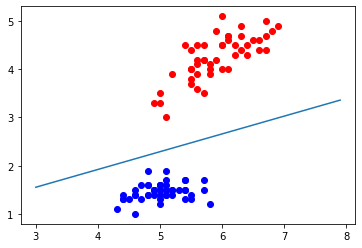

In [20]:
x_range=np.arange(3,8,0.1)
y_calc=[i*slope+wolny for i in x_range]
a=data_to_plot.loc[:100,['x1','x2','y']].values
plt.scatter(a[:50,0],a[:50,1],color='blue')
plt.scatter(a[51:,0],a[51:,1],color='red')

plt.plot(x_range,y_calc)

In [235]:
data=data_to_plot[['x1','x2']].values

In [239]:
type(data)

numpy.ndarray

#
Below I'm gonna create plots that will wisualise the tendency of cost function for each epoch with different learning rate value.
It's visible that is learning rate is small perceptron learns slowly, but is convergent. If learning rate is bigger perceptron is divergent which means that we are far from minimum.

Text(0.5, 1.0, 'Learning rate 0.0001')

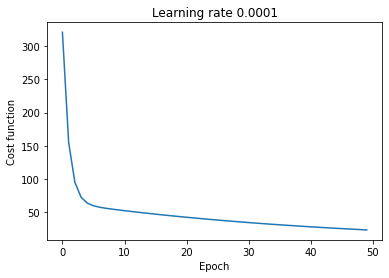

In [34]:
plt.plot(range(len(adeline.cost_)),adeline.cost_)
plt.xlabel('Epoch')
plt.ylabel('Cost function')
plt.title('Learning rate 0.0001')

Text(0.5, 1.0, 'Learning rate 0.01')

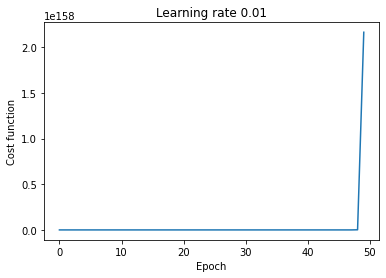

In [31]:
plt.plot(range(len(adeline.cost_)),adeline.cost_)
plt.xlabel('Epoch')
plt.ylabel('Cost function')
plt.title('Learning rate 0.01')

Now we can visualize how many epoch will it take perceptron to diverge.
Analyzing plot we can see that after 100 iteration's perceptron is close to minimum of cost functions which simply mean that we cannot do a lot better to find optimal weights. If learning rate is lower our algorithm learn's a lot slower what  can easily observed on a plot.

Text(0.5, 1.0, 'Learning rate  0.0001')

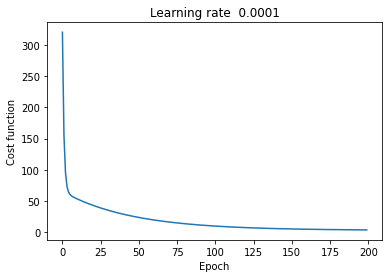

In [37]:
plt.plot(range(len(adeline.cost_)),adeline.cost_)
plt.xlabel('Epoch')
plt.ylabel('Cost function')
plt.title('Learning rate  0.0001')

Text(0.5, 1.0, 'Learning rate  0.001')

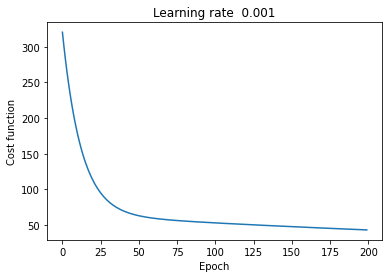

In [41]:
plt.plot(range(len(adeline.cost_)),adeline.cost_)
plt.xlabel('Epoch')
plt.ylabel('Cost function')
plt.title('Learning rate  0.00001')